In [47]:
from urllib.request import urlopen
import bs4
import re

In [48]:
url='https://www.indeed.com/jobs?q=analyst&l='
source = urlopen(url).read().decode('utf-8')
bsource=bs4.BeautifulSoup(source, "lxml")
tag=bsource.find("div", {"id": "searchCountPages"})
print(tag.string)


                    Page 1 of 75,487 jobs


https://www.w3schools.com/python/python_regex.asp

In [3]:
re.search("jobs$", tag.string)

<re.Match object; span=(38, 42), match='jobs'>

In [4]:
def talalatok():
    x = re.search("\d*,?\d* jobs$", tag.string)
    return int(x.group()[:-5].replace(',',''))

In [5]:
talalatok()

75536

In [18]:
def talalatok_string0(job):
    url='http://www.indeed.com/jobs?q='+job+'&l='
    source = urlopen(url).read().decode('utf-8')
    bsource=bs4.BeautifulSoup(source, "lxml")
    tag=bsource.find("div", {"id": "searchCountPages"})
    x = re.search("\d*,?\d* jobs$", tag.string)
    return int(x.group()[:-5].replace(',',''))

In [19]:
talalatok_string0('python')

87298

In [20]:
# talalatok_string('python analyst')

In [21]:
def talalatok_string(job):
    job=job.replace(' ','+')
    url='http://www.indeed.com/jobs?q='+job+'&l='
    source = urlopen(url).read().decode('utf-8')
    bsource=bs4.BeautifulSoup(source, "lxml")
    tag=bsource.find("div", {"id": "searchCountPages"})
    x = re.search("\d*,?\d* jobs$", tag.string)
    return int(x.group()[:-5].replace(',',''))

In [22]:
talalatok_string('python analyst')

6758

In [23]:
#jobs=['python developer', 'R developer', 'Java developer', 'financial analyst', 'finncial advisor', 'python']
jobs=['python developer', 'R developer']
for job in (jobs):
    print(job, ': ', talalatok_string(job))

python developer :  31602
R developer :  2728


In [24]:
url='https://www.indeed.com/jobs?q=financial+analyst&l='
source = urlopen(url).read().decode('utf-8')
bsource=bs4.BeautifulSoup(source, "lxml")

In [25]:
locations=bsource.findAll("span", {"class":"location accessible-contrast-color-location"})

In [26]:
locations_string=[job.text for job in locations]
locations_string

['Remote',
 'Remote',
 'Hinckley, MN 55037',
 'Culver City, CA',
 'Goodlettsville, TN 37072',
 'Remote',
 'Boston, MA 02109 (Haymarket area)',
 'Marietta, GA 30060',
 'New York, NY',
 'San Francisco, CA',
 'Rochester, MI',
 'Holyoke, MA 01040',
 'Downey, CA',
 'San Diego, CA 92108',
 'Atlanta, GA 30309 (Brookwood Hills area)']

In [27]:
re.search('^[a-zA-Z ]*',locations_string[4]).group()

'Goodlettsville'

In [28]:
cities=[re.search('^[a-zA-Z ]*',i).group() for i in locations_string]

In [29]:
cities

['Remote',
 'Remote',
 'Hinckley',
 'Culver City',
 'Goodlettsville',
 'Remote',
 'Boston',
 'Marietta',
 'New York',
 'San Francisco',
 'Rochester',
 'Holyoke',
 'Downey',
 'San Diego',
 'Atlanta']

In [30]:
for i in range(10,100,10):
    print(i)

10
20
30
40
50
60
70
80
90


In [ ]:
# 3. oldal
url2='https://www.indeed.com/jobs?q=financial+analyst&start=20'

In [31]:
for i in range(1,3):
    url='https://www.indeed.com/jobs?q=financial+analyst&start='+str(i)
    source = urlopen(url).read().decode('utf-8')
    bsource=bs4.BeautifulSoup(source, "lxml")
    locations=bsource.findAll("span", {"class":"location accessible-contrast-color-location"})
    locations_string=[job.text for job in locations]
    new_cities=[re.search('^[a-zA-Z ]*',i).group() for i in locations_string]
    cities+=new_cities

In [32]:
cities

['Remote',
 'Remote',
 'Hinckley',
 'Culver City',
 'Goodlettsville',
 'Remote',
 'Boston',
 'Marietta',
 'New York',
 'San Francisco',
 'Rochester',
 'Holyoke',
 'Downey',
 'San Diego',
 'Atlanta',
 'San Jose',
 'Friendswood',
 'Clanton',
 'Virginia Beach',
 'Camp Hill',
 'Santa Clara Valley',
 'Remote',
 'Remote',
 'Boston',
 'Littleton',
 'Union City',
 'Tucson',
 'Washington',
 'Burbank',
 'El Dorado Hills',
 'San Jose',
 'Friendswood',
 'Clanton',
 'Virginia Beach',
 'Camp Hill',
 'Santa Clara Valley',
 'Remote',
 'Remote',
 'Boston',
 'Littleton',
 'Union City',
 'Tucson',
 'Washington',
 'Burbank',
 'El Dorado Hills']

In [33]:
len(cities)

45

In [34]:
from collections import Counter

In [35]:
Counter(cities)['Remote']

7

In [36]:
sorted([(value,key) for (key,value) in Counter(cities).items()], reverse=True)

[(7, 'Remote'),
 (3, 'Boston'),
 (2, 'Washington'),
 (2, 'Virginia Beach'),
 (2, 'Union City'),
 (2, 'Tucson'),
 (2, 'Santa Clara Valley'),
 (2, 'San Jose'),
 (2, 'Littleton'),
 (2, 'Friendswood'),
 (2, 'El Dorado Hills'),
 (2, 'Clanton'),
 (2, 'Camp Hill'),
 (2, 'Burbank'),
 (1, 'San Francisco'),
 (1, 'San Diego'),
 (1, 'Rochester'),
 (1, 'New York'),
 (1, 'Marietta'),
 (1, 'Holyoke'),
 (1, 'Hinckley'),
 (1, 'Goodlettsville'),
 (1, 'Downey'),
 (1, 'Culver City'),
 (1, 'Atlanta')]

In [37]:
def generate_url(job, site_nr):
    job_link=job.replace(' ','+')
    if site_nr==1:
        url='http://www.indeed.com/jobs?q='+job_link+'&l='
        return url
    else:
        url='http://www.indeed.com/jobs?q='+job_link+'&start='+str(site_nr*10-10)
        return url
    
generate_url('financial analyst',3)

'http://www.indeed.com/jobs?q=financial+analyst&start=20'

In [38]:
def get_cities(page):
    url=page
    source = urlopen(url).read().decode('utf-8')
    bsource=bs4.BeautifulSoup(source, "lxml")
    locations=bsource.findAll("span", {"class":"location accessible-contrast-color-location"})
    
    locations_string=[job.text for job in locations]
    cities=[re.search('^[a-zA-Z ]*',i).group() for i in locations_string]
    return cities

In [39]:
cities=[]
for i in range(1,2):
    cities+=get_cities(generate_url('python developer',i))
Counter(cities)['Remote']

4

In [40]:
jobs=['python developer', 'R developer', 'Java developer', 'financial analyst', 'finncial advisor', 'python']

In [41]:
remote_jobs={}
remote_jobs_rate={}
for job in jobs:
    cities=[]
    for i in range(1,2):
        cities+=get_cities(generate_url('python developer',i))
    remote_jobs[job]=Counter(cities)['Remote']
    remote_jobs_rate[job]=int(Counter(cities)['Remote'])/150

In [42]:
remote_jobs

{'python developer': 7,
 'R developer': 6,
 'Java developer': 7,
 'financial analyst': 6,
 'finncial advisor': 7,
 'python': 7}

In [46]:
remote_jobs_rate

{'python developer': 0.04666666666666667,
 'R developer': 0.04,
 'Java developer': 0.04666666666666667,
 'financial analyst': 0.04,
 'finncial advisor': 0.04666666666666667,
 'python': 0.04666666666666667}

([<matplotlib.axis.XTick at 0x1b823c79448>,
 <a list of 6 Text xticklabel objects>)

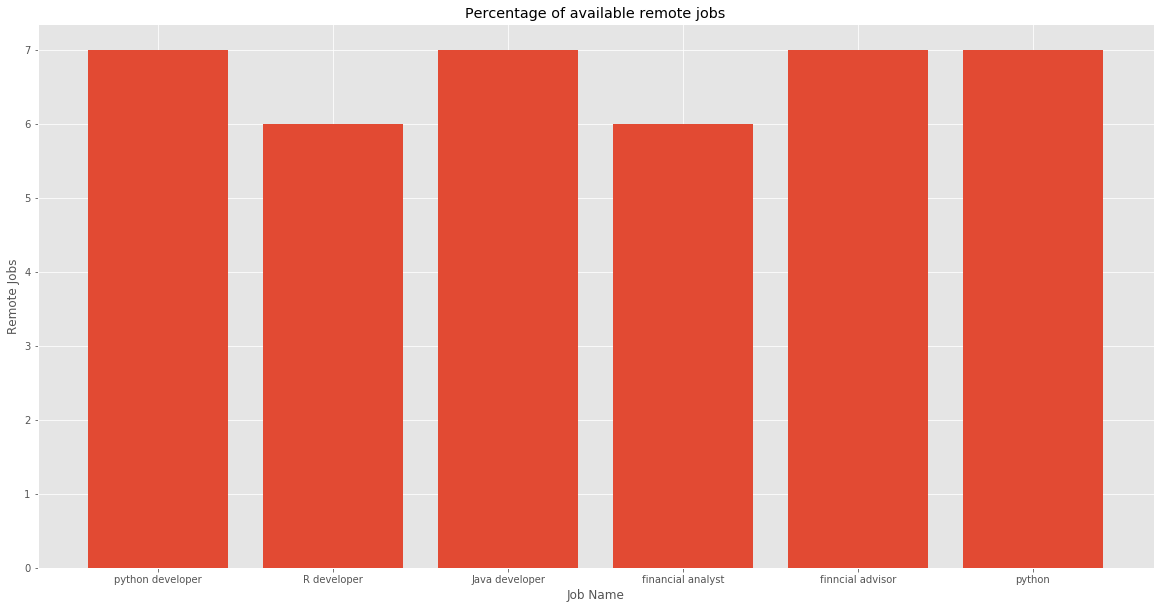

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))
plt.style.use('ggplot')

plt.xlabel('Job Name')  
plt.ylabel('Remote Jobs')  

plt.title("Percentage of available remote jobs") 

plt.bar(range(len(remote_jobs)), list(remote_jobs.values()), align='center')
plt.xticks(range(len(remote_jobs)), list(remote_jobs.keys()))